
# Visualizer Widgets

Visualizer widgets allow you to interactively explore a session as you would in a Vapor GUI visualizer.
This notebook shows how to use visualizer widgets and how to add additional dynamic parameter inputs.


*Note: Widgets require an active kernel to operate. To try it out, run this notebook on your local machine.*

In [1]:
import example_utils
from vapor import session, renderer, dataset, camera, widget

ses = session.Session()
data = example_utils.OpenExampleDataset(ses)

Vapor 3.10.0
Python 3.9.19 (/opt/anaconda3/envs/vapor)
OpenGL 4.1 Metal - 89.3



## Render an Iso Surface


UNSUPPORTED (log once): POSSIBLE ISSUE: unit 2 GLD_TEXTURE_INDEX_3D is unloadable and bound to sampler type (Float) - using zero texture because texture unloadable


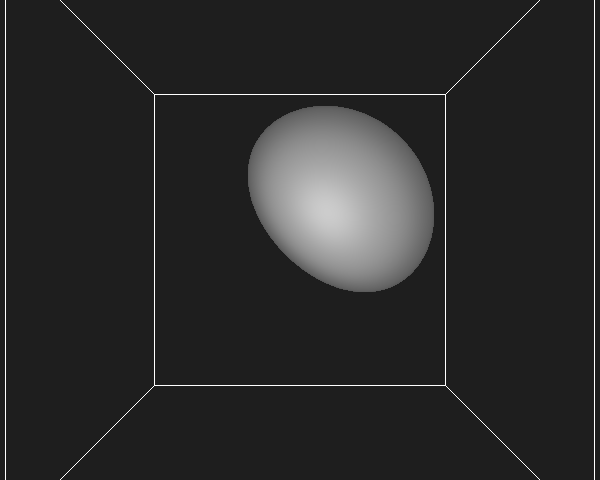

In [2]:
ren = data.NewRenderer(renderer.VolumeIsoRenderer)
ren.SetVariableName(data.GetDataVarNames(3)[0]) # Set to first 2D data variable
ren.SetIsoValues([ren.GetIsoValues()[0]+0.1])

ses.GetCamera().ViewAll()
ses.Show()


## Create a visualizer to explore the scene

Try dragging the image to rotate the view.
Hover over the visualizer to see the full controls.


In [3]:
viz = widget.VaporVisualizerWidget(ses)
viz

VaporVisualizerWidget(imageData='/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aH…


## Add an interactive iso value slider using **ipywidgets**


In [4]:
tf = ren.GetPrimaryTransferFunction()
dataRange = tf.GetMinMaxMapValue()

def sliderChanged(change):
    ren.SetIsoValues([change.new])
    viz.Render(fast=True)

slider = widgets.FloatSlider(value=ren.GetIsoValues()[0], min=dataRange[0], max=dataRange[1], step=(dataRange[1]-dataRange[0])/100)
slider.observe(sliderChanged, names='value')

widgets.VBox([
    viz,
    widgets.HBox([widgets.Label("Iso value:"), slider])
])

NameError: name 'widgets' is not defined